<a href="https://colab.research.google.com/github/yy51/machine-learning/blob/master/adam_vs_sgd_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###TensorFlowのインポート

In [1]:
!pip install tensorflow-gpu==2.0.0-rc1
import tensorflow as tf

from tensorflow.keras import datasets, layers, models

     |████████████████████████████████| 380.5MB 46kB/s 
     |████████████████████████████████| 4.3MB 57.0MB/s 
     |████████████████████████████████| 501kB 58.3MB/s 


###データセットのダウンロードと準備

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


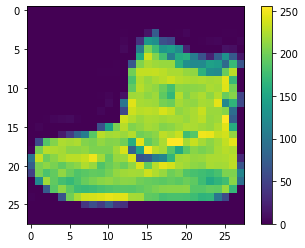

In [3]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [4]:
print(train_labels)

[9 0 0 ... 3 0 5]


In [5]:
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# ピクセルの値を 0~1 の間に正規化
train_images, test_images = train_images / 255.0, test_images / 255.0

In [6]:
import numpy as np
n_labels = len(np.unique(train_labels))
train_labels_onehot = np.eye(n_labels)[train_labels]

In [7]:
n_labels = len(np.unique(test_labels))
test_labels_onehot = np.eye(n_labels)[test_labels]

In [8]:
print(n_labels)
print(test_labels_onehot)
print(test_labels)

10
[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[9 2 1 ... 8 1 5]


### モデル作成

In [66]:
model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.Flatten())
model1.add(layers.Dense(64, activation='relu'))
model1.add(layers.Dense(10, activation='softmax'))

In [56]:
model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.Flatten())
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dense(10, activation='softmax'))

In [57]:
model3 = models.Sequential()
model3.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(64, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(64, (3, 3), activation='relu'))
model3.add(layers.Flatten())
model3.add(layers.Dense(64, activation='relu'))
model3.add(layers.Dense(10, activation='softmax'))

In [58]:
model4 = models.Sequential()
model4.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(64, (3, 3), activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(64, (3, 3), activation='relu'))
model4.add(layers.Flatten())
model4.add(layers.Dense(64, activation='relu'))
model4.add(layers.Dense(10, activation='softmax'))

###モデルのコンパイルと学習

In [67]:
model1.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

sgd_scc = model1.fit(train_images, train_labels, epochs=30, validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 7s 119us/sample - loss: 0.9941 - accuracy: 0.6389 - val_loss: 0.6573 - val_accuracy: 0.7511
Epoch 2/30
60000/60000 [==============================] - 7s 112us/sample - loss: 0.5818 - accuracy: 0.7806 - val_loss: 0.5943 - val_accuracy: 0.7737
Epoch 3/30
60000/60000 [==============================] - 7s 109us/sample - loss: 0.4913 - accuracy: 0.8173 - val_loss: 0.5062 - val_accuracy: 0.8104
Epoch 4/30
60000/60000 [==============================] - 7s 109us/sample - loss: 0.4379 - accuracy: 0.8408 - val_loss: 0.4483 - val_accuracy: 0.8354
Epoch 5/30
60000/60000 [==============================] - 7s 111us/sample - loss: 0.4035 - accuracy: 0.8536 - val_loss: 0.4109 - val_accuracy: 0.8527
Epoch 6/30
60000/60000 [==============================] - 7s 114us/sample - loss: 0.3812 - accuracy: 0.8605 - val_loss: 0.4058 - val_accuracy: 0.8529
Epoch 7/30
60000/60000 [==========================

In [60]:
model2.compile(optimizer='sgd',
              loss='mean_squared_error',
              metrics=['accuracy'])

sgd_mse = model2.fit(train_images, train_labels_onehot, epochs=100, validation_data=(test_images, test_labels_onehot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 7s 116us/sample - loss: 0.0894 - accuracy: 0.1394 - val_loss: 0.0891 - val_accuracy: 0.1651
Epoch 2/100
60000/60000 [==============================] - 6s 108us/sample - loss: 0.0886 - accuracy: 0.2193 - val_loss: 0.0879 - val_accuracy: 0.2563
Epoch 3/100
60000/60000 [==============================] - 7s 110us/sample - loss: 0.0867 - accuracy: 0.2982 - val_loss: 0.0849 - val_accuracy: 0.3625
Epoch 4/100
60000/60000 [==============================] - 7s 110us/sample - loss: 0.0796 - accuracy: 0.4162 - val_loss: 0.0716 - val_accuracy: 0.4481
Epoch 5/100
60000/60000 [==============================] - 7s 110us/sample - loss: 0.0625 - accuracy: 0.5744 - val_loss: 0.0541 - val_accuracy: 0.6343
Epoch 6/100
60000/60000 [==============================] - 7s 108us/sample - loss: 0.0486 - accuracy: 0.6593 - val_loss: 0.0455 - val_accuracy: 0.6643
Epoch 7/100
60000/60000 [===================

In [61]:
model3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

adam_scc = model3.fit(train_images, train_labels, epochs=20, validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 123us/sample - loss: 0.4886 - accuracy: 0.8203 - val_loss: 0.3865 - val_accuracy: 0.8574
Epoch 2/20
60000/60000 [==============================] - 7s 116us/sample - loss: 0.3165 - accuracy: 0.8847 - val_loss: 0.3165 - val_accuracy: 0.8841
Epoch 3/20
60000/60000 [==============================] - 7s 115us/sample - loss: 0.2686 - accuracy: 0.9019 - val_loss: 0.2830 - val_accuracy: 0.8958
Epoch 4/20
60000/60000 [==============================] - 7s 116us/sample - loss: 0.2408 - accuracy: 0.9101 - val_loss: 0.2781 - val_accuracy: 0.8989
Epoch 5/20
60000/60000 [==============================] - 7s 113us/sample - loss: 0.2194 - accuracy: 0.9188 - val_loss: 0.2647 - val_accuracy: 0.9040
Epoch 6/20
60000/60000 [==============================] - 7s 114us/sample - loss: 0.1986 - accuracy: 0.9265 - val_loss: 0.2701 - val_accuracy: 0.9012
Epoch 7/20
60000/60000 [==========================

In [62]:
model4.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['accuracy'])

adam_mse = model4.fit(train_images, train_labels_onehot, epochs=20, validation_data=(test_images, test_labels_onehot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 133us/sample - loss: 0.0257 - accuracy: 0.8148 - val_loss: 0.0188 - val_accuracy: 0.8713
Epoch 2/20
60000/60000 [==============================] - 8s 126us/sample - loss: 0.0170 - accuracy: 0.8826 - val_loss: 0.0185 - val_accuracy: 0.8725
Epoch 3/20
60000/60000 [==============================] - 7s 115us/sample - loss: 0.0149 - accuracy: 0.8978 - val_loss: 0.0163 - val_accuracy: 0.8864
Epoch 4/20
60000/60000 [==============================] - 7s 115us/sample - loss: 0.0136 - accuracy: 0.9076 - val_loss: 0.0143 - val_accuracy: 0.9026
Epoch 5/20
60000/60000 [==============================] - 7s 116us/sample - loss: 0.0124 - accuracy: 0.9169 - val_loss: 0.0141 - val_accuracy: 0.9031
Epoch 6/20
60000/60000 [==============================] - 7s 116us/sample - loss: 0.0116 - accuracy: 0.9214 - val_loss: 0.0163 - val_accuracy: 0.8905
Epoch 7/20
60000/60000 [==========================

###グラフ描画

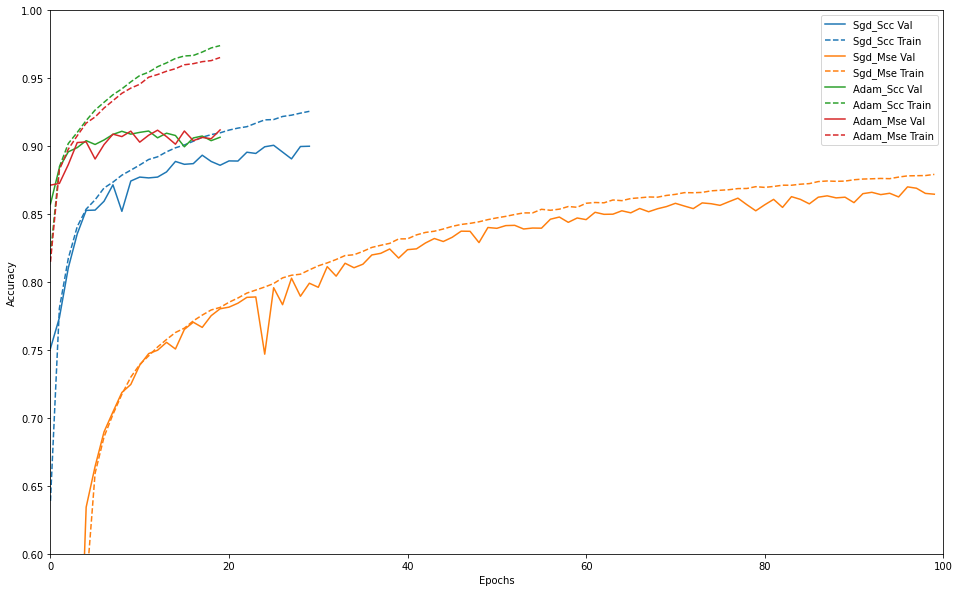

In [78]:
import matplotlib.pyplot as plt

def plot_history(histories, key='accuracy'):
  plt.figure(figsize=(16,10))
    
  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                    label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], '--', color=val[0].get_color(), label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

#  plt.hlines([0.99], 0, 4, "blue", linestyles='dashed') 

#  plt.xlim([0,max(history.epoch)])
  plt.xlim([0,100])
  plt.ylim([0.6,1])

plot_history([('sgd_scc', sgd_scc),('sgd_mse', sgd_mse),('adam_scc', adam_scc),('adam_mse', adam_mse)])

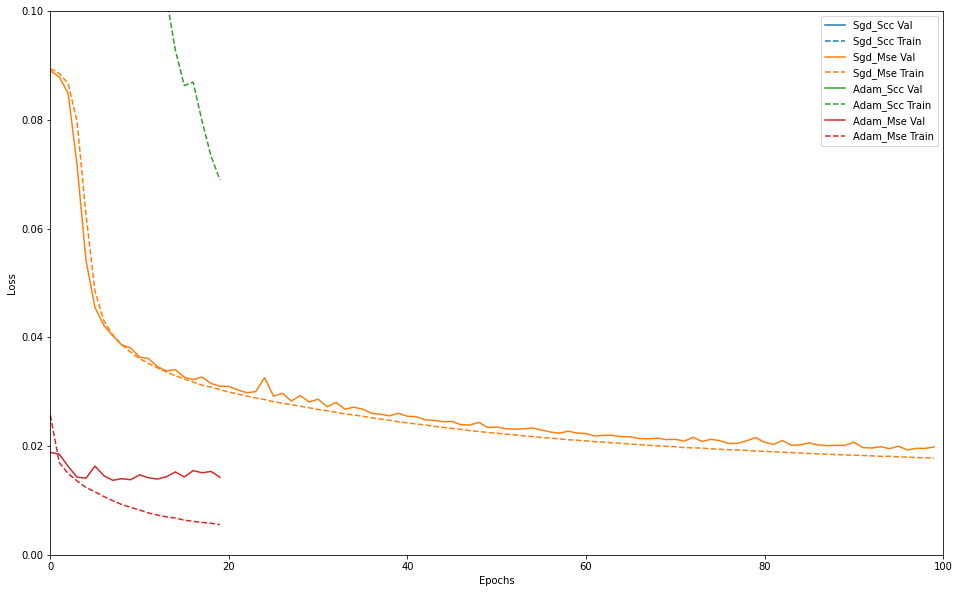

In [81]:
import matplotlib.pyplot as plt

def plot_history(histories, key='loss'):
  plt.figure(figsize=(16,10))
    
  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], '--', color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

#  plt.hlines([0.99], 0, 4, "blue", linestyles='dashed') 

#  plt.xlim([0,max(history.epoch)])
  plt.xlim([0,100])
  plt.ylim([0,0.1])

plot_history([('sgd_scc', sgd_scc),('sgd_mse', sgd_mse),('adam_scc', adam_scc),('adam_mse', adam_mse)])